In [ ]:
!pip install easyocr pandas -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 39.1 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spacy

In [ ]:
IMAGE_PATH = '/content/business-card-design-template-9414cc40c5b84b17bc5a8b99a79ac4bf_screen.jpg'


In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[356, 43], [641, 43], [641, 92], [356, 92]],
  'JOHNATHON SMITH',
  0.9515993070452373),
 ([[60, 82], [128, 82], [128, 106], [60, 106]], 'LOGO', 0.9817936310525452),
 ([[485, 86], [640, 86], [640, 113], [485, 113]],
  'Marketing Manager',
  0.9904625231636239),
 ([[100, 208], [234, 208], [234, 232], [100, 232]],
  '+123 456 7894',
  0.8336736227163577),
 ([[97, 240], [330, 240], [330, 268], [97, 268]],
  'youreamil@company.com',
  0.9166664897251762),
 ([[98, 278], [330, 278], [330, 302], [98, 302]],
  '456 East West, Park Road',
  0.6587223604277289),
 ([[98, 302], [208, 302], [208, 326], [98, 326]],
  'Sample, NA',
  0.6543594275206824),
 ([[98, 336], [272, 336], [272, 360], [98, 360]],
  'wwwcompany.com',
  0.6971723650990108)]

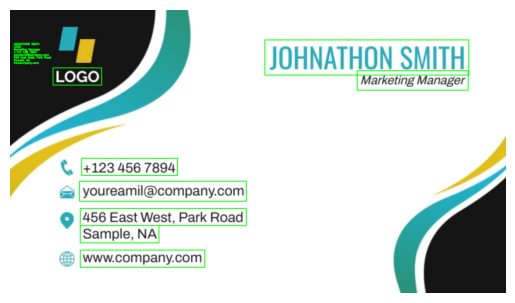

In [ ]:
# Check if the result is populated
if not result:
    raise ValueError("The result list is empty")

# Load the image
img = cv2.imread(IMAGE_PATH)

# Check if the image is loaded successfully
if img is None:
    raise ValueError(f"Could not load image from path: {IMAGE_PATH}")

# Resize the image
scale_percent = 400  # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Define font and initial spacer
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 200

# Iterate over each detection in the result
for detection in result:
    if len(detection) < 2 or len(detection[0]) < 4:
        print(f"Invalid detection format: {detection}")
        continue

    try:
        # Extract and convert coordinates to integers
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]

        # Adjust coordinates according to the resized image
        top_left = (int(top_left[0] * scale_percent / 100), int(top_left[1] * scale_percent / 100))
        bottom_right = (int(bottom_right[0] * scale_percent / 100), int(bottom_right[1] * scale_percent / 100))

        # Draw rectangle and text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        spacer += 15
    except Exception as e:
        print(f"Error processing detection {detection}: {e}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
text_segments = []
for detection in result:
    text = detection[1]  # The detected text is in the second position of the tuple
    text_segments.append(text)

# Join the list into a single string with spaces separating the words
full_text = ' '.join(text_segments)

# Print the final result
print(full_text)


JOHNATHON SMITH LOGO Marketing Manager +123 456 7894 youreamil@company.com 456 East West, Park Road Sample, NA wwwcompany.com


In [ ]:
# Load the SpaCy model for English
nlp = spacy.load('en_core_web_sm')

# Process the text with SpaCy
doc = nlp(full_text.lower())

# Initialize a list to hold person names
person_names = []

# Loop through the named entities and filter for person names
for ent in doc.ents:
    print(f"Detected entity: {ent.text} - Label: {ent.label_}")  # Print all detected entities
    if ent.label_ == 'PERSON':
        person_names.append(ent.text)

# Print the detected person names
print("Person names detected:", person_names)

Detected entity: johnathon smith - Label: PERSON
Detected entity: 456 7894 - Label: CARDINAL
Detected entity: 456 - Label: CARDINAL
Person names detected: ['johnathon smith']


In [ ]:
data = [{'bounding_box': item[0], 'text': item[1], 'confidence': item[2]} for item in result]
df = pd.DataFrame(data)
print(df)


                                       bounding_box                      text  \
0      [[356, 43], [641, 43], [641, 92], [356, 92]]           JOHNATHON SMITH   
1      [[60, 82], [128, 82], [128, 106], [60, 106]]                      LOGO   
2    [[485, 86], [640, 86], [640, 113], [485, 113]]         Marketing Manager   
3  [[100, 208], [234, 208], [234, 232], [100, 232]]             +123 456 7894   
4    [[97, 240], [330, 240], [330, 268], [97, 268]]     youreamil@company.com   
5    [[98, 278], [330, 278], [330, 302], [98, 302]]  456 East West, Park Road   
6    [[98, 302], [208, 302], [208, 326], [98, 326]]                Sample, NA   
7    [[98, 336], [272, 336], [272, 360], [98, 360]]            wwwcompany.com   

   confidence  
0    0.951599  
1    0.981794  
2    0.990463  
3    0.833674  
4    0.916666  
5    0.658722  
6    0.654359  
7    0.697172  


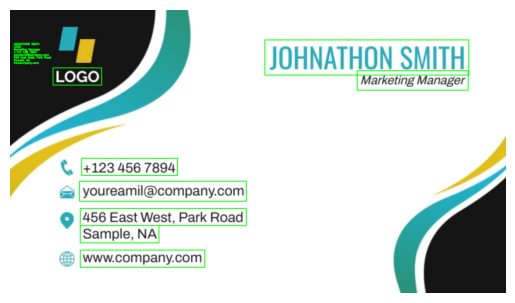

                                       bounding_box                      text  \
0      [[356, 43], [641, 43], [641, 92], [356, 92]]           JOHNATHON SMITH   
1      [[60, 82], [128, 82], [128, 106], [60, 106]]                      LOGO   
2    [[485, 86], [640, 86], [640, 113], [485, 113]]         Marketing Manager   
3  [[100, 208], [234, 208], [234, 232], [100, 232]]             +123 456 7894   
4    [[97, 240], [330, 240], [330, 268], [97, 268]]     youreamil@company.com   
5    [[98, 278], [330, 278], [330, 302], [98, 302]]  456 East West, Park Road   
6    [[98, 302], [208, 302], [208, 326], [98, 326]]                Sample, NA   
7    [[98, 336], [272, 336], [272, 360], [98, 360]]            wwwcompany.com   

   confidence  
0    0.951599  
1    0.981794  
2    0.990463  
3    0.833674  
4    0.916666  
5    0.658722  
6    0.654359  
7    0.697172  


In [ ]:
# Load the image
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise ValueError(f"Could not load image from path: {IMAGE_PATH}")

# Resize the image
scale_percent = 400  # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Define font and initial spacer
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 200

# Iterate over each detection in the result
for detection in result:
    if len(detection) < 2 or len(detection[0]) < 4:
        print(f"Invalid detection format: {detection}")
        continue

    try:
        # Extract and convert coordinates to integers
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]

        # Adjust coordinates according to the resized image
        top_left = (int(top_left[0] * scale_percent / 100), int(top_left[1] * scale_percent / 100))
        bottom_right = (int(bottom_right[0] * scale_percent / 100), int(bottom_right[1] * scale_percent / 100))

        # Draw rectangle and text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        spacer += 15
    except Exception as e:
        print(f"Error processing detection {detection}: {e}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Convert OCR result to a DataFrame
data = [{'bounding_box': item[0], 'text': item[1], 'confidence': item[2]} for item in result]
df = pd.DataFrame(data)
print(df)


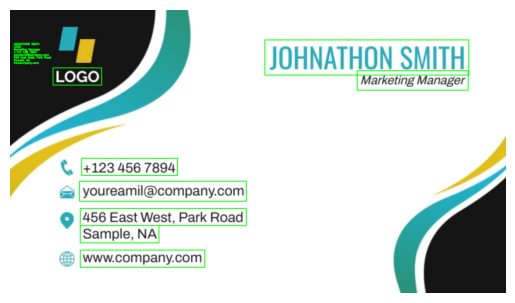

              Name          Job Title     Company          Phone  \
0  JOHNATHON SMITH  Marketing Manager  Sample, NA  +123 456 7894   

                   Email         Website                   Address Other  
0  youreamil@company.com  wwwcompany.com  456 East West, Park Road  LOGO  


In [ ]:
import re
# Load the image
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise ValueError(f"Could not load image from path: {IMAGE_PATH}")

# Resize the image
scale_percent = 400  # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Define font and initial spacer
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 200

# Iterate over each detection in the result
for detection in result:
    if len(detection) < 2 or len(detection[0]) < 4:
        print(f"Invalid detection format: {detection}")
        continue

    try:
        # Extract and convert coordinates to integers
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]

        # Adjust coordinates according to the resized image
        top_left = (int(top_left[0] * scale_percent / 100), int(top_left[1] * scale_percent / 100))
        bottom_right = (int(bottom_right[0] * scale_percent / 100), int(bottom_right[1] * scale_percent / 100))

        # Draw rectangle and text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        spacer += 15
    except Exception as e:
        print(f"Error processing detection {detection}: {e}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

# Convert OCR result to a DataFrame
data = [{'bounding_box': item[0], 'text': item[1], 'confidence': item[2]} for item in result]
df = pd.DataFrame(data)

# Define a function to classify text data into columns using SpaCy NER
def classify_text(text):
    doc = nlp(text)
    if '@' in text:
        return 'Email'

    elif '+' in text:  # Regular expression for matching phone numbers
        return 'Phone'
    elif text.lower().startswith('www') or '.com' in text or '.org' in text:
        return 'Website'
    elif re.match(r'\b\d{1,5}\s\w{2,}\s\w{2,}\b', text):  # Regular expression for matching addresses
        return 'Address'
    elif any(ent.label_ == 'PERSON' for ent in doc.ents):
        return 'Name'
    elif any(ent.label_ == 'ORG' for ent in doc.ents):
        return 'Company'
    elif any(token.text in ['Director', 'Manager', 'Coordinator', 'Specialist'] for token in doc):
        return 'Job Title'
    if text.isdigit() and text == "Logo":
        return 'Other'
    else:
        return 'Other'

# Apply classification
df['category'] = df['text'].apply(classify_text)

# Initialize lists to store categorized information
categories = {
    'Name': [],
    'Job Title': [],
    'Company': [],
    'Phone': [],
    'Email': [],
    'Website': [],
    'Address': [],
    'Other': []  # Add 'Other' category
}

# Populate the lists with categorized data
for index, row in df.iterrows():
    category = classify_text(row['text'])
    categories[category].append(row['text'])

# Find the maximum length among all lists
max_length = max(len(category_list) for category_list in categories.values())

# Pad the lists to ensure they all have the same length
for category in categories:
    if categories[category]:
        categories[category] += [None] * (max_length - len(categories[category]))

# Ensure all arrays have the same length
for category in categories:
    if len(categories[category]) < max_length:
        categories[category] += [None] * (max_length - len(categories[category]))

# Create a structured DataFrame
structured_df = pd.DataFrame(categories)

# Clean the DataFrame by removing rows where all values are None
structured_df = structured_df.dropna(how='all')

print(structured_df)
